In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
import pickle


##### Q1 A -Import ‘signal-data.csv’ as DataFrame

In [2]:
signal_df = pd.read_csv("signal-data.csv")
signal_df.head(10)
signal_df.shape

(1567, 592)

##### Q1 B -Print 5 point summary and share at least 2 observations.

In [3]:
signal_df.describe(include='all')

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
unique,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-10-15 01:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,NaN,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,NaN,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,NaN,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,NaN,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,NaN,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000


#Insights
1. Count of rows accross columns is not consistent.
2. Some columns data has data which is in thousands and some columns data falls in range 0 to 1, which needs to be standardized
3. Target variable is Pass/Fail.
4. Column 4 has max 1114.53 and remaining data min, 25%, 50% and 75% of the data range is below 2 .
5. Column 5 has std deviation of 0 where the data is same accross all rows.

##### Q2 A -Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature

In [4]:
def remove_and_impute_features(data, threshold):
    total_rows = data.shape[0]
    num_cols = data.shape[1]

    new_data = data.copy()
    for col in data.columns:
        if (col != 'Time' and col!='Pass/Fail' ):
            null_count = data[col].isnull().sum()
            null_percentage = (null_count / total_rows) * 100.0

            if null_percentage > threshold:
                new_data.drop(col, axis=1, inplace=True)
            else:
                # Calculate the mean of the column and impute null values with the mean
                mean_value = data[col].mean()
                new_data[col].fillna(mean_value, inplace=True)

    return new_data


In [5]:
# Set the threshold for null percentage (e.g., 20%)
null_threshold = 20.0

# Call the function to remove and impute features
processed_data = remove_and_impute_features(signal_df, null_threshold)

In [6]:
processed_data.shape

(1567, 560)

In [7]:
processed_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


##### Q2 B -Identify and drop the features which are having same value for all the rows.

In [8]:
def drop_constant_features(data):
    constant_features = [col for col in data.columns if data[col].nunique() == 1]
    data.drop(constant_features, axis=1, inplace=True)
    return data

# Call the function to drop constant features
processed_data = drop_constant_features(processed_data)

In [9]:
processed_data.shape

(1567, 444)

##### Q2 C -Drop other features if required using relevant functional knowledge. Clearly justify the same

###### 1. Drop Low Variance or Constant Features:

In [10]:
def find_low_variance_features(data, threshold=0.01):
    # Calculate the variance for each column
    variances = data.var()

    # Filter features with variance below the threshold
    low_variance_features = variances[variances < threshold]

    return low_variance_features.index.tolist()

# Set the threshold for low variance (0.001)
variance_threshold = 0.001

# Call the function to find features with low variance
low_variance_features = find_low_variance_features(processed_data, variance_threshold)

print("Features with low variance:")
print(low_variance_features)
print("Count of Features with low variance:")
print(len(low_variance_features))

processed_data.drop(low_variance_features, axis=1, inplace=True)
processed_data.head()

Features with low variance:
['7', '9', '10', '11', '17', '20', '56', '57', '75', '77', '79', '81', '84', '87', '92', '93', '94', '95', '100', '101', '103', '104', '105', '106', '113', '114', '116', '118', '119', '131', '143', '145', '146', '147', '153', '211', '212', '215', '216', '219', '221', '227', '228', '238', '239', '249', '253', '254', '267', '278', '279', '280', '281', '282', '288', '291', '303', '306', '307', '309', '311', '342', '348', '349', '350', '351', '352', '353', '354', '355', '357', '359', '360', '362', '365', '366', '367', '368', '376', '377', '386', '387', '389', '391', '392', '405', '542', '543', '544', '567', '582', '583', '584', '586', '587', '588']
Count of Features with low variance:
96


C:\Users\seshabhattark\AppData\Local\Temp\ipykernel_46880\3266182785.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = data.var()


,Time,0,1,2,3,4,6,8,12,14,...,571,572,573,574,575,576,577,585,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,1.5005,202.4396,7.9558,...,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,2.3630,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,1.4966,200.5470,10.1548,...,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,4.4447,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,1.4436,202.0179,9.5157,...,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,3.1745,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,1.4882,201.8482,9.6052,...,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,2.0544,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,1.5031,201.9424,10.5661,...,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,99.3032,73.843200,-1


Dropped the columns where the standard deviation is below 0.001 as there willnot be much change in the data across rows which is same data having the same data across rows. This will remove the noise introduced in the dataset.

#### Q2 D -Check for multi-collinearity in the data and take necessary action.

In [11]:
# Calculate the correlation matrix
correlation_matrix = processed_data.corr()

# Find highly correlated pairs
threshold = 0.9  # Define your threshold for high correlation
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Highly correlated pairs count:",len(highly_correlated_pairs))

# Drop one column from each highly correlated pair
columns_to_drop = set()
for pair in highly_correlated_pairs:
    columns_to_drop.add(pair[1])

processed_data_cleaned = processed_data.drop(columns=columns_to_drop)

print("\nOriginal DataFrame:")
print(processed_data.shape)

print("\nDataFrame after dropping highly correlated columns:")
print(processed_data_cleaned.shape)

C:\Users\seshabhattark\AppData\Local\Temp\ipykernel_46880\2926533673.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = processed_data.corr()


Highly correlated pairs count: 262

Original DataFrame:
(1567, 348)

DataFrame after dropping highly correlated columns:
(1567, 206)


#### Q2 E -Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

1. Dropped the columns with the same data accross all rows. Remove features with low variance as they may not provide meaningful information and might even introduce noise into the model.
2. Dropped the columns where the standard deviation(low variance) is below 0.001 as there willnot be much change in the data accross columns which is same data having the same data accross rows. Remove features with low variance as they may not provide meaningful information and might even introduce noise into the model.
3. When multicollinearity is detected, it's important to address it. Options include removing one of the correlated features, combining correlated features into new features, or using techniques like ridge regression that can handle multicollinearity to some extent.

Both low variance and multicollinearity can lead to suboptimal model performance, so it's important to preprocess data and perform feature engineering to address these issues before training models.

#### Q3 A -Perform a detailed univariate Analysis with appropriate detailed comments after each analysis

<Axes: xlabel='Pass/Fail', ylabel='Count'>

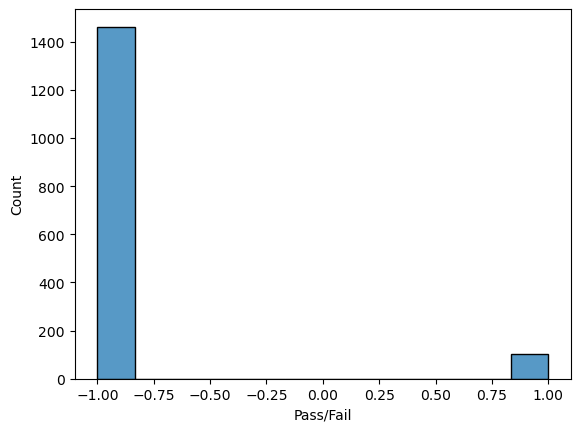

In [12]:
sns.histplot(processed_data_cleaned,x='Pass/Fail')

##### Insights
The count of fail is very high when compared to the count of pass which shows minority data for Pass(1)

<Axes: xlabel='12', ylabel='Density'>

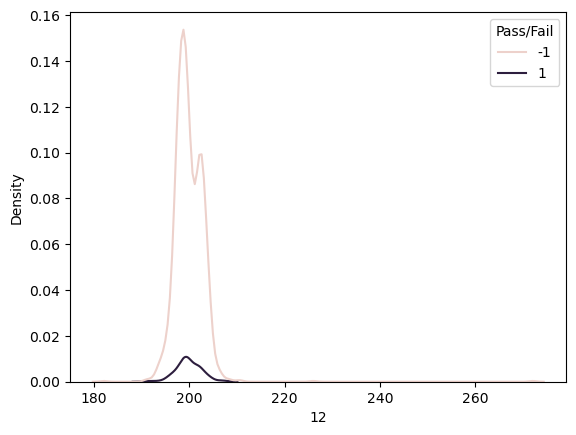

In [13]:
sns.kdeplot(processed_data_cleaned,x='12',hue='Pass/Fail')

##### Insights
For row 12 the count of Pass is very less compared to the count of Fail. There are 2 peaks for -1 and 1 peak for 1.

<Axes: xlabel='Pass/Fail', ylabel='3'>

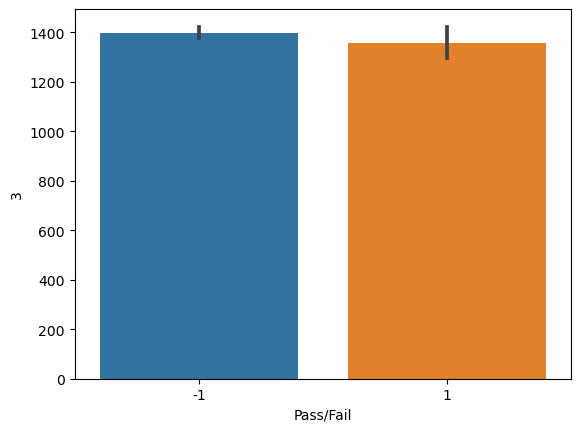

In [14]:
sns.barplot(processed_data_cleaned,y='3',x='Pass/Fail')

Shorter Line: The shorter line indicates the lower bound of the confidence interval around the mean.

Longer Line: The longer line indicates the upper bound of the confidence interval around the mean.

This representation shows the level of uncertainty in the mean estimate. The longer the error bars, the wider the confidence interval, indicating higher uncertainty in the precise location of the true population mean.

#### Q3 B -Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

<Axes: xlabel='572', ylabel='0'>

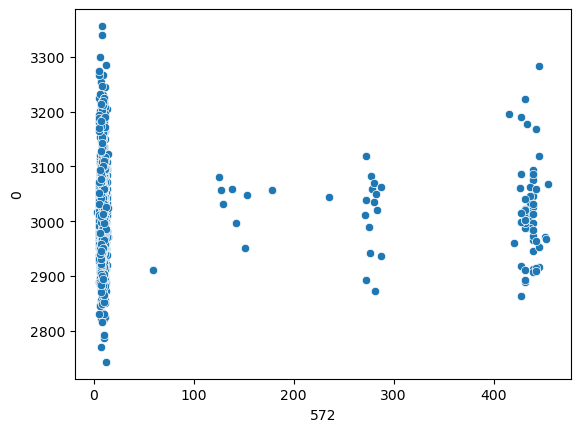

In [15]:
sns.scatterplot(data=processed_data_cleaned,x='572',y='0' )

Duplicate data points (or very similar points) along a X axis, vertical lines in the scatter plot. This can happen when multiple data points share the same x-coordinate but have different y-coordinates.

<Axes: xlabel='Pass/Fail', ylabel='1'>

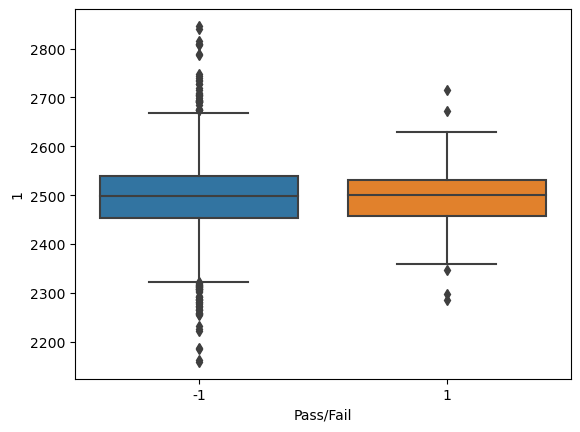

In [16]:
sns.boxplot(data= processed_data_cleaned,y='1',x='Pass/Fail')


Boxplot shows the many outliers for the Fail scenario(-1) for column 1. The median is matching for Pass and Fail but the 75% of Pass is slightly less range which shows its skewness.

<Axes: >

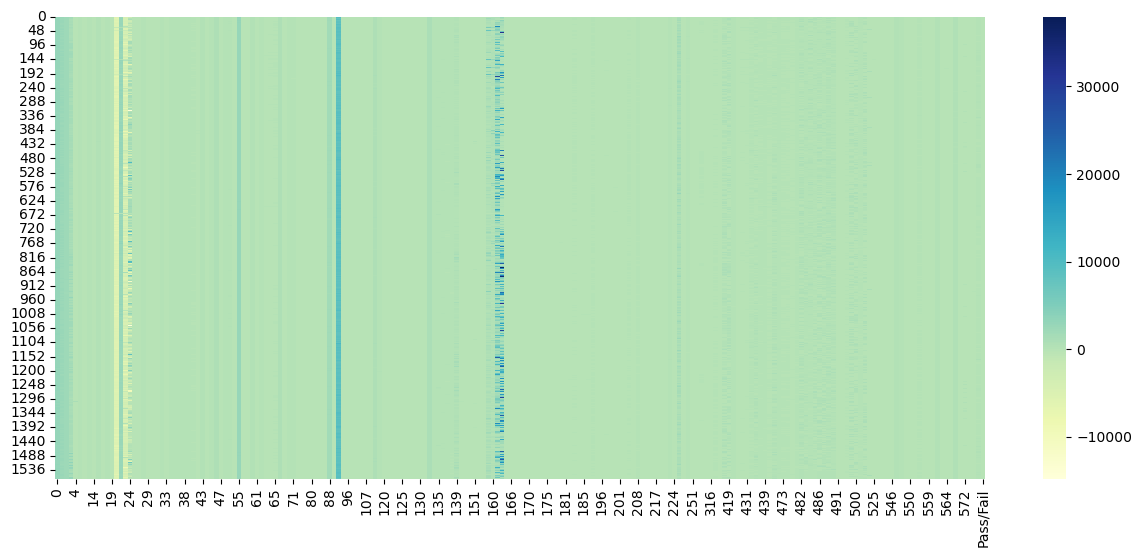

In [17]:
plt.figure(figsize=(15, 6))  # Adjust width and height as needed
sns.heatmap(processed_data_cleaned.drop("Time",axis=1),cmap="YlGnBu")

Maximum data falls in the green range
Some Columns between 19 and 24 have negative data which depicts yellow color
Columns between 88 and 96 have data closer to 10000 which depicts blue color line

#### Q4 A -Segregate predictors vs target attributes

In [18]:
X = processed_data_cleaned.drop(columns=['Pass/Fail','Time'])  # Drop 'Pass/Fail','Time' columns
y = processed_data_cleaned['Pass/Fail'] #Target column

#### Q4 B -Check for target balancing and fix it if found imbalanced.

In [19]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [20]:
# Perform oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
print("Class Counts after Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class Counts after Oversampling:
-1    1463
 1    1463
Name: Pass/Fail, dtype: int64


#### Q4 C -Perform train-test split and standardize the data or vice versa if required

In [21]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Q4 D -Check if the train and test data have similar statistical characteristics when compared with original data

In [22]:
# Compare summary statistics
original_stats = X.describe()
train_stats = pd.DataFrame(X_train_scaled, columns=X.columns).describe()
test_stats = pd.DataFrame(X_test_scaled, columns=X.columns).describe()

percentage_change_train = ((train_stats - original_stats) / original_stats) * 100
percentage_change_test = ((test_stats - original_stats) / original_stats) * 100


print("Original Data Statistics:")
print(original_stats)

print("\nTrain Data Statistics:")
print(train_stats)

print("\nTest Data Statistics:")
print(test_stats)

print("Percentage Change in Train Data:")
print(percentage_change_train)

print("\nPercentage Change in Test Data:")
print(percentage_change_test)

Original Data Statistics:
                 0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            8           12           14           15  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.112908     1.462862   199.956809     9.005371   413.086035  ...   
std       6.209271     0.073849     3.255195     2.793916    17.204591

##### Difference between train and test data compared to original data is very minimal. They are almost same.

    Percentage Change in Train Data from Original Data:

                 0           1           2           3           4           6  
    mean  -100.000000 -100.000000 -100.000000 -100.000000 -100.000000 -100.000000   
    std    -98.638553  -98.753051  -96.595073  -99.772488  -98.216855  -83.888619   
    min   -100.132778 -100.194190 -100.229733        -inf -109.906665 -103.783032   
    25%   -100.022438 -100.021895 -100.028582 -100.065065 -106.103012 -100.550461   
    50%   -100.001467  -99.998544  -99.999529 -100.019197 -104.355560  -99.936101   
    75%    -99.981543  -99.979188  -99.974065  -99.971881 -103.529515  -99.446697   
    max    -99.864122  -99.850765  -99.831999  -99.856764  -98.412119  -96.420588   


    Percentage Change in Test Data from Original Data:
                 0           1           2           3           4           6  
    mean  -100.002282 -100.002491  -99.999079  -99.995889 -101.360808  -99.959288   
    std    -98.761142  -98.788793  -96.680384  -99.765071  -99.988679  -82.422450   
    min   -100.111196 -100.178505 -100.136160        -inf -109.906665 -103.759932   
    25%   -100.020300 -100.023386 -100.032136 -100.064843 -106.109085 -100.397783   
    50%   -100.002065 -100.000499  -99.998845 -100.015777 -104.376872  -99.873399   
    75%    -99.983745  -99.981598  -99.969548  -99.962596 -103.535380  -99.483076   
    max    -99.924422  -99.847725  -99.882388  -99.868156 -100.003330  -96.420588  

#### Q5 A -Use any Supervised Learning technique to train a model

In [23]:
# Create a kNN model
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)


# Train the KNN model on the training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_train = knn_model.predict(X_train_scaled)

y_pred_test = knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy Train: {accuracy_train:.2f}")
print(f"Accuracy Test: {accuracy_test:.2f}")

Accuracy Train: 0.93
Accuracy Test: 0.91


#### Q5 B -Use cross validation techniques

In [24]:
# Perform 5-fold cross-validation
num_folds = 5
scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=num_folds)

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")

# Calculate and print the average accuracy
average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy:.2f}")

Fold 1: Accuracy = 0.88
Fold 2: Accuracy = 0.88
Fold 3: Accuracy = 0.88
Fold 4: Accuracy = 0.89
Fold 5: Accuracy = 0.91
Average Accuracy: 0.89


#### Q5 D -Use any other technique/method which can enhance the model performance

In [25]:
# Calculate the correlation matrix
correlation_matrix = processed_data_cleaned.corr()

# Find highly correlated pairs
threshold = 0.7  # Define your threshold for high correlation
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Extract columns to be used for PCA
columns_for_pca = set()
for pair in highly_correlated_pairs:
    columns_for_pca.add(pair[0])
    columns_for_pca.add(pair[1])

# Apply PCA to selected columns
pca = PCA(n_components=len(columns_for_pca))

X_pca_train = pca.fit_transform(X_train_scaled)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_train, y_train, test_size=0.2, random_state=42)

# Train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)
X_train.shape

C:\Users\seshabhattark\AppData\Local\Temp\ipykernel_46880\1258042028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = processed_data_cleaned.corr()


(1872, 68)

In [37]:
# Predict using the trained model
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)
# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy Train: {accuracy_train:.2f}")
print(f"Accuracy Test: {accuracy_test:.2f}")

Accuracy Train: 0.97
Accuracy Test: 0.93


#### Q5 C -Apply hyper-parameter tuning techniques to get the best accuracy

In [38]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7],  # List of values to try for k
    'algorithm':['auto','ball_tree', 'kd_tree', 'brute']
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best k value from the grid search
best_k = grid_search.best_params_['n_neighbors']

# Predict using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9572649572649573


#### Q5 E -Display and explain the classification report in detail.

Best k: 3
Accuracy: 0.96
Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 3}
Best Score:  0.9556777183600713
Train Set Score:  0.9572649572649573
Test Set Score:  0.9572649572649573
---------------------------
Classification Report: 
              precision    recall  f1-score   support

          -1       1.00      0.92      0.96       240
           1       0.92      1.00      0.96       228

    accuracy                           0.96       468
   macro avg       0.96      0.96      0.96       468
weighted avg       0.96      0.96      0.96       468

---------------------------


<Axes: >

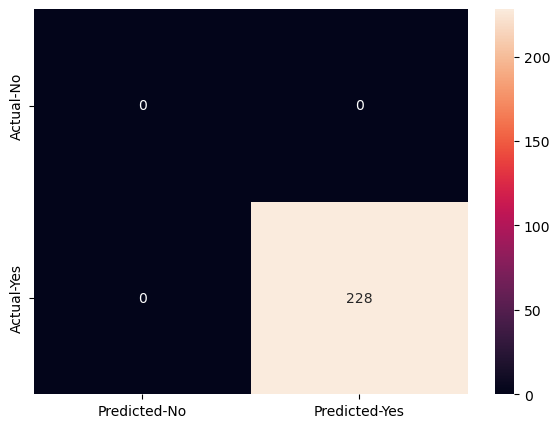

In [28]:
print(f"Best k: {best_k}")
print(f"Accuracy: {accuracy:.2f}")

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model on the test set
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)
print("Train Set Score: ", test_score)
print("Test Set Score: ", test_score)

print('---------------------------')
print("Classification Report: ")
print(classification_report(y_test, y_pred))
print('---------------------------')

cm=confusion_matrix(y_test, y_pred,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual-No","Actual-Yes"]], columns = [i for i in ["Predicted-No","Predicted-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

The classifcation report shows the 
1. Accuracy of the model has been 93.0 before applying gridsearch to 96.0 after applying gridsearch 
2. Precision of -1(Fail) to 1 and 1(Pass) to 0.92 , showcasing the true positive predictions among all positive predictions.
3. Recall of -1 to 0.92 and 1 to 1 i.e True Postive Rate of Fail as 0.92 and Pass as 1
4. F1 score as 0.96 , determining the balance between precision and recall as 0.96.


#### Q5 F -Apply the above steps for all possible models that you have learnt so far

#### GradientBoostingClassifier

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 50}
Best Score:  0.9967971479500891
Train Set Score:  0.9957264957264957
Test Set Score:  0.9957264957264957
---------------------------
Classification Report: 
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       240
           1       0.99      1.00      1.00       228

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468

---------------------------


<Axes: >

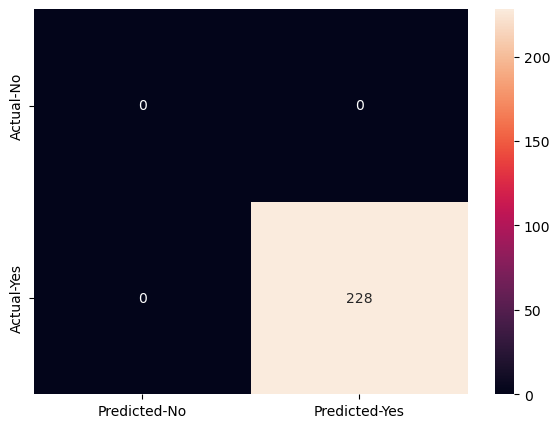

In [29]:
gbcl = GradientBoostingClassifier(random_state=1)

param_grid = {
    'n_estimators': [10, 50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'max_features':['sqrt','log2']
}
grid_search_gbcl = GridSearchCV(gbcl, param_grid, cv=5)
grid_search_gbcl.fit(X_train, y_train)
y_predict = grid_search_gbcl.predict(X_test)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search_gbcl.best_params_)
print("Best Score: ", grid_search_gbcl.best_score_)

# Evaluate the model on the test set
train_score = grid_search_gbcl.score(X_train, y_train)
test_score = grid_search_gbcl.score(X_test, y_test)
print("Train Set Score: ", test_score)
print("Test Set Score: ", test_score)

print('---------------------------')
print("Classification Report: ")
print(classification_report(y_test, y_predict))
print('---------------------------')

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual-No","Actual-Yes"]], columns = [i for i in ["Predicted-No","Predicted-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### DecisionTreeClassifier

Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score:  0.9535258467023173
Train Score:  1.0
Test Score:  0.9465811965811965
---------------------------
Precision:  0.9505928853754941
Recall:  0.9479166666666667
---------------------------
Classification Report: 
              precision    recall  f1-score   support

          -1       1.00      0.90      0.95       240
           1       0.90      1.00      0.95       228

    accuracy                           0.95       468
   macro avg       0.95      0.95      0.95       468
weighted avg       0.95      0.95      0.95       468

---------------------------


<Axes: >

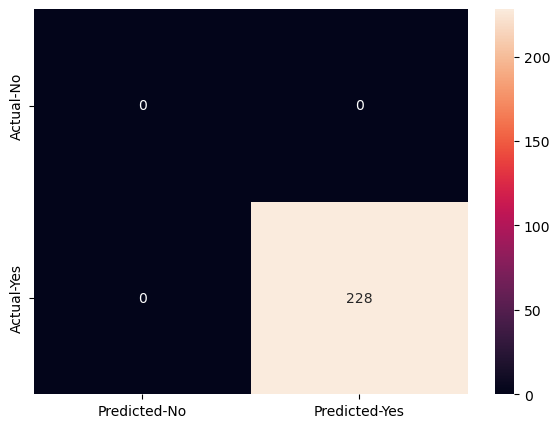

In [30]:
dTree = DecisionTreeClassifier(random_state=1)
#Define Parameters for grid search
grid_params = {
    'criterion':['gini','entropy'],
    'max_depth':[None,3,5,7,9],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features': [None, 'sqrt', 'log2']
}

#Perform GridSearch with CV

grid_search_dTree = GridSearchCV(dTree,grid_params,cv=5)
grid_search_dTree.fit(X_train,y_train)
y_predict = grid_search_dTree.predict(X_test)

# Print the best parameters and the corresponding score
print("Best Parameters: ",grid_search_dTree.best_params_)
print("Best Score: ",grid_search_dTree.best_score_)

# Evaluate the model on the train and test set
train_score = grid_search_dTree.score(X_train, y_train)
test_score = grid_search_dTree.score(X_test, y_test)
print("Train Score: ", train_score)
print("Test Score: ", test_score)
print('---------------------------')
print("Precision: ",precision_score(y_test, y_predict, average='macro'))
print("Recall: ",recall_score(y_test, y_predict, average='macro'))
print('---------------------------')
print("Classification Report: ")
print(classification_report(y_test, y_predict))
print('---------------------------')
cm = confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual-No","Actual-Yes"]], columns = [i for i in ["Predicted-No","Predicted-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### RandomForestClassifier

Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.9951942959001782
Training Set Score:  0.999465811965812
Test Set Score:  0.9935897435897436
---------------------------
Classification Report: 
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       240
           1       0.99      1.00      0.99       228

    accuracy                           0.99       468
   macro avg       0.99      0.99      0.99       468
weighted avg       0.99      0.99      0.99       468

---------------------------


<Axes: >

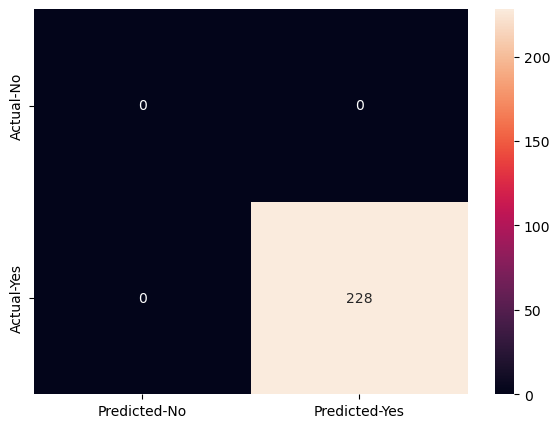

In [31]:
rfcl = RandomForestClassifier(random_state=1)
# Define the parameter grid for the grid search
param_grid_rfcl = {
    'n_estimators': [10, 50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}
grid_search_rfcl = GridSearchCV(rfcl, param_grid_rfcl, cv=5)
grid_search_rfcl.fit(X_train, y_train)
y_predict = grid_search_rfcl.predict(X_test)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search_rfcl.best_params_)
print("Best Score: ", grid_search_rfcl.best_score_)

# Evaluate the model on the train and test set
train_score = grid_search_rfcl.score(X_train, y_train)
test_score = grid_search_rfcl.score(X_test, y_test)
print("Training Set Score: ", train_score)
print("Test Set Score: ", test_score)
print('---------------------------')
print("Classification Report: ")
print(classification_report(y_test, y_predict))
print('---------------------------')
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual-No","Actual-Yes"]], columns = [i for i in ["Predicted-No","Predicted-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

###### AdaBoostClassifier

Best Parameters:  {'estimator': DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5), 'learning_rate': 0.5, 'n_estimators': 50}
Best Score:  0.9994666666666667
Train Set Score:  1.0
Test Set Score:  0.9978632478632479
---------------------------
Classification Report: 
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       228

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468

---------------------------


<Axes: >

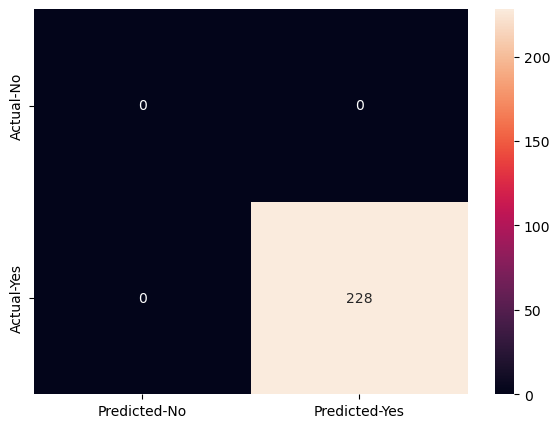

In [32]:
abcl = AdaBoostClassifier()

param_grid = {
    'n_estimators': [10, 50],
    'learning_rate': [0.1, 0.5],
    'estimator': [None, DecisionTreeClassifier(max_depth=5,criterion='gini',max_features='sqrt',min_samples_leaf=5)],

}
# Perform grid search with cross-validation
grid_search_abcl = GridSearchCV(abcl, param_grid, cv=5)
grid_search_abcl.fit(X_train, y_train)
y_predict = grid_search_abcl.predict(X_test)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search_abcl.best_params_)
print("Best Score: ", grid_search_abcl.best_score_)

# Evaluate the model on the test set
train_score = grid_search_abcl.score(X_train, y_train)
test_score = grid_search_abcl.score(X_test, y_test)
print("Train Set Score: ", train_score)
print("Test Set Score: ", test_score)
print('---------------------------')
print("Classification Report: ")
print(classification_report(y_test, y_predict))
print('---------------------------')
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual-No","Actual-Yes"]], columns = [i for i in ["Predicted-No","Predicted-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Best Parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  1.0
Train Set Score:  1.0
Test Set Score:  1.0
---------------------------
Classification Report: 
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       228

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468

---------------------------


<Axes: >

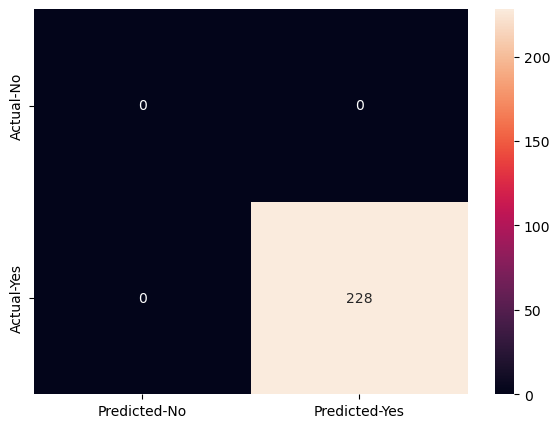

In [39]:
svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale']
}

# Create a GridSearchCV instance
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Perform grid search with cross-validation
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)
y_predict = grid_search_svm.predict(X_test)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search_svm.best_params_)
print("Best Score: ", grid_search_svm.best_score_)

# Evaluate the model on the test set
train_score = grid_search_svm.score(X_train, y_train)
test_score = grid_search_svm.score(X_test, y_test)
print("Train Set Score: ", train_score)
print("Test Set Score: ", test_score)
print('---------------------------')
print("Classification Report: ")
print(classification_report(y_test, y_predict))
print('---------------------------')
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual-No","Actual-Yes"]], columns = [i for i in ["Predicted-No","Predicted-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### Q6 A-Display and compare all the models designed with their train and test accuracies

In [33]:
def get_metrics_score(model,flag=True):
    score_list= []
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train,average='macro')
    test_recall = metrics.recall_score(y_test,pred_test,average='macro')
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train,average='macro')
    test_precision = metrics.precision_score(y_test,pred_test,average='macro')
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    return score_list


In [34]:
def compare_models(model,model_names):
    acc_train = []
    acc_test = []
    recall_train = []
    recall_test = []
    precision_train= []
    precision_test = []

    for model in models:
        j= get_metrics_score(model,False)
        acc_train.append(np.round(j[0],2))
        acc_test.append(np.round(j[1],2))
        recall_train.append(np.round(j[2],2))
        recall_test.append(np.round(j[3],2))
        precision_train.append(np.round(j[4],2))
        precision_test.append(np.round(j[5],2))


    comparision_frame = pd.DataFrame({'Model':model_names,
                                             'Train_accuracy':acc_train,'Test_accuracy':acc_test,
                                             'Train_Recall':recall_train,'Test_Recall':recall_test,
                                             'Train_Precision':precision_train,'Test_Precision':precision_test})
    return comparision_frame


In [40]:
models = [grid_search_dTree, grid_search_gbcl,grid_search_rfcl,grid_search_abcl,grid_search_svm,grid_search]
model_names = ['Decision Tree','Gradient Boost','Random Forest','AdaBoost','SVM','KNN']

comparision_frame = compare_models(models,model_names)
comparision_frame

,Model,Train_accuracy,Test_accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.00,0.95,1.00,0.95,1.00,0.95
1,Gradient Boost,1.00,1.00,1.00,1.00,1.00,1.00
2,Random Forest,1.00,0.99,1.00,0.99,1.00,0.99
3,AdaBoost,1.00,1.00,1.00,1.00,1.00,1.00
4,SVM,1.00,1.00,1.00,1.00,1.00,1.00
5,KNN,0.98,0.96,0.98,0.96,0.98,0.96


#### Q6 B -Select the final best trained model along with your detailed comments for selecting this model.

From the above comparision chart its clear that the best trained model can be choose as SVM, Gradient Boost, Random Forest and AdaBoost are giving the highest accuracy, recall, precision for both training and test data when compared to KNN and Decision Tree algorithms.

#### Q6 C -Pickle the selected model for future use

In [41]:
# Save the model to a file using pickle
model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f"Model saved as {model_filename}")

Model saved as best_model.pkl


#### Q6 D -Write your conclusion on the results

First, we preprocessed the dataset by splitting it into training and testing sets, standardizing the features to ensure uniform scaling, and then applying the kNN algorithm using scikit-learn's KNeighborsClassifier. We employed the PCA, GridSearchCV technique to perform a systematic search over a range of hyperparameters and find the best combination that maximizes model performance.Then repeated the above steps for SVM, RandomForest, AdaBoost, DecisionTree, GradientBoost. Finally we can see the results in the comparision table of the algorithms applied for the accuracy, precision, recall which gives a clear idea of which algorithm can be used for best performance.